# 와인의 베스트모델 찾기

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
# seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload() 
filename = list(uploaded.keys())[0]
filename #wine.csv

Saving wine.csv to wine.csv


'wine.csv'

In [ ]:
df = pd.read_csv(filename, header=None) #첫열부터 데이터라  header=None
df.head(3) #결과12컬럼이 숫자로되어있어서 레이블인코딩안해도됨

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [ ]:
#정규화안하고진행(별로차이가안나서)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values, stratify=df.iloc[:,-1].values, random_state=seed
)
X_train.shape, X_test.shape
#((4872, 12), (1625, 12))

((4872, 12), (1625, 12))

### 모델정의/설정

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

### 모델저장관련 환경설정

In [ ]:
import os #디렉토리명령어
MODEL_DIR = './model/' #모델디렉토리
if not os.path.exists(MODEL_DIR):#없으면만들어라
    os.mkdir(MODEL_DIR)

In [ ]:
!ls -l

total 364
drwxr-xr-x 2 root root   4096 Feb 10 00:56 model
drwxr-xr-x 1 root root   4096 Feb  4 15:26 sample_data
-rw-r--r-- 1 root root 361279 Feb 10 00:45 wine.csv


In [ ]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
#monitor='val_loss' 4가지중선택가능
#verbose=1 최소한보여줌/ 0안보여줌/ 2다보여줌
#save_best_only=True 물어보고이전보다좋으면저장, 아니면 모두다저장함;

### 모델학습 및 저장

In [ ]:
model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=200, 
          verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.41822, saving model to ./model/best001-0.4182.hdf5

Epoch 00002: val_loss improved from 0.41822 to 0.28623, saving model to ./model/best002-0.2862.hdf5

Epoch 00003: val_loss improved from 0.28623 to 0.24628, saving model to ./model/best003-0.2463.hdf5

Epoch 00004: val_loss improved from 0.24628 to 0.22050, saving model to ./model/best004-0.2205.hdf5

Epoch 00005: val_loss improved from 0.22050 to 0.20001, saving model to ./model/best005-0.2000.hdf5

Epoch 00006: val_loss improved from 0.20001 to 0.19209, saving model to ./model/best006-0.1921.hdf5

Epoch 00007: val_loss improved from 0.19209 to 0.18488, saving model to ./model/best007-0.1849.hdf5

Epoch 00008: val_loss improved from 0.18488 to 0.18360, saving model to ./model/best008-0.1836.hdf5

Epoch 00009: val_loss improved from 0.18360 to 0.17670, saving model to ./model/best009-0.1767.hdf5

Epoch 00010: val_loss improved from 0.17670 to 0.17541, saving model to ./model/best010-0.1754

### 잘못된 평가0.9778

In [ ]:
acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')
#베스트모델로한것이 아니기때문에 0.9778 (교수님0.9791)

51/51 [==============================] - 0s 956us/step - loss: 0.0720 - accuracy: 0.9778
Accuracy: 0.9778


### 베스트 모델로 평가

In [ ]:
#저장된모델(베스트모델)불러오기
from tensorflow.keras.models import load_model

best_model = load_model('./model/best196-0.0530.hdf5') #베스트모델불러온다음에 acc
acc = best_model.evaluate(X_test, y_test) 
print(f'Accuracy: {acc[1]:.4f}')
#베스트모델로했는데0.9778똑같?(교수님0.9778)

51/51 [==============================] - 0s 929us/step - loss: 0.0750 - accuracy: 0.9778
Accuracy: 0.9778


### 시각화

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#시각화하려면 다시 모델생성,환경설정,학습 해야함 ㅋ.ㅋ
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=200, 
          verbose=0)

In [ ]:
type(history.history) #dict형태로 acuuracy, loss, vall_acuurasy, vall_loss

dict

In [ ]:
y_vloss=history.history['val_loss'] # y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_acc=history.history['accuracy'] # y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_vacc=history.history['val_accuracy']
y_loss=history.history['loss']

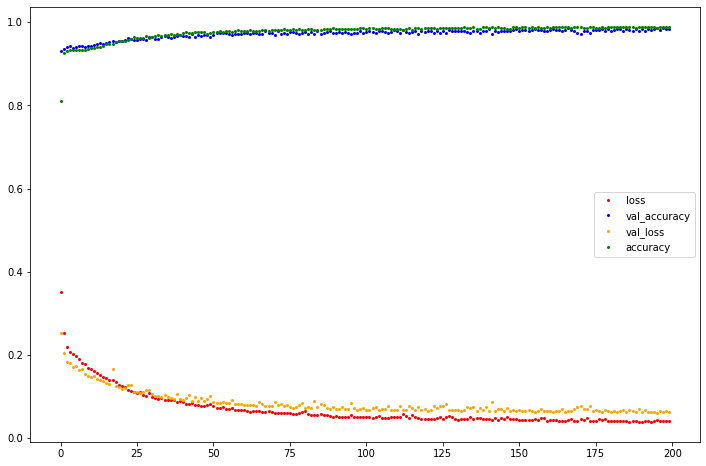

In [ ]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_loss, "o", c="red", markersize=2, label='loss')
plt.plot(x_len, y_vacc, "o", c="blue", markersize=2, label='val_accuracy')
plt.plot(x_len, y_vloss, "o", c="orange", markersize=2, label='val_loss')
plt.plot(x_len, y_acc, "o", c="green", markersize=2, label='accuracy')
plt.legend()
plt.show()